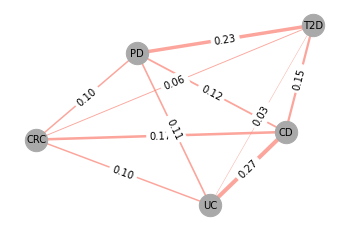

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample data representing similarities between objects
similarity_data = {
    ("CD", "CRC"): 0.17,
    ("CD", "UC"): 0.27,
    ("CD", "PD"): 0.12,
    ("CD", "T2D"): 0.15,
    ("UC", "CRC"): 0.1,
    ("UC", "PD"): 0.11,
    ("UC", "T2D"): 0.03,
    ("CRC", "PD"): 0.1,
    ("CRC", "T2D"): 0.06,
    ("PD", "T2D"): 0.23
}

# Create a graph
G = nx.Graph()

# Add nodes
nodes = set(node for edge in similarity_data.keys() for node in edge)
G.add_nodes_from(nodes)

# Add edges with similarity scores as weights
for edge, similarity in similarity_data.items():
    G.add_edge(edge[0], edge[1], weight=similarity)

# Customize the plot
pos = nx.spring_layout(G, seed=42)  # Layout algorithm with a fixed seed for reproducibility

# Define edge widths based on similarity scores
edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]
edge_widths = [w * 15 for w in edge_weights]  # Adjust the scaling factor as needed

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='darkgray')
nx.draw_networkx_labels(G, pos, font_size=10)

# Draw edges with widths based on similarity scores
nx.draw_networkx_edges(
    G,
    pos,
    width=edge_widths,
    edge_color='salmon',
    alpha=0.7,
)

# Draw edge labels with custom font color
edge_labels = {(u, v): f"{weight:.2f}" for (u, v), weight in similarity_data.items()}
edge_label_colors = 'black'  # Change this to your desired font color
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color=edge_label_colors)

# Show the plot
plt.axis('off')  # Turn off axis labels
#plt.show()
plt.savefig("similarity_network_diseased_associated.pdf", format="pdf", bbox_inches="tight")

NetworkXError: Node 'AD' has no position.

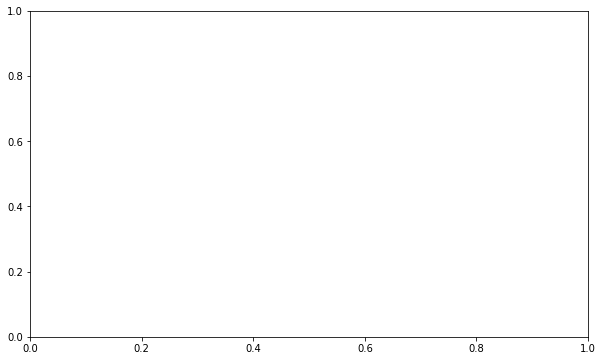

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample data representing similarities between objects
similarity_data_diseased = {
    ("CD", "UC"): 0.27,("CD", "PD"): 0.12,("CD", "T2D"): 0.15,("CD", "CRC"): 0.17,("CD", "Schizophrenia"): 0.09,("CD", "AD"): 0.01,
    ("UC", "PD"): 0.11,("UC", "T2D"): 0.03,("UC", "CRC"): 0.1,("UC", "Schizophrenia"): 0.01,("UC", "AD"): 0.01,
    ("PD", "T2D"): 0.23,("PD", "CRC"): 0.1,("PD", "Schizophrenia"): 0.09,("PD", "AD"): 0.04,
    ("T2D", "CRC"): 0.06,("T2D", "Schizophrenia"): 0.09,("T2D", "AD"): 0.05,
    ("CRC", "Schizophrenia"): 0.11,("CRC", "AD"): 0.06,
    ("Schizophrenia", "AD"): 0.08
}

similarity_data_healthy = {
    ("CD", "UC"): 0.18,("CD", "PD"):0.07,("CD", "T2D"):0.04,("CD", "CRC"): 0.12,("CD", "Schizophrenia"):0.06,("CD", "AD"):0.03,
    ("UC", "PD"): 0.1,("UC", "T2D"): 0.01,("UC", "CRC"): 0.07,("UC", "Schizophrenia"): 0.08,("UC", "AD"): 0.02,
    ("PD", "T2D"): 0.12,("PD", "CRC"): 0.07,("PD", "Schizophrenia"): 0.06,("PD", "AD"): 0.04,
    ("T2D", "CRC"): 0.13,("T2D", "Schizophrenia"): 0.2,("T2D", "AD"): 0.03,
    ("CRC", "Schizophrenia"): 0.02,("CRC", "AD"): 0.09,
    ("Schizophrenia", "AD"): 0.01
}

# Create graphs
G_diseased = nx.Graph()
G_healthy = nx.Graph()

# Add nodes and edges with similarity scores as weights
for G, similarity_data, edge_color in zip([G_diseased, G_healthy], [similarity_data_diseased, similarity_data_healthy], ['salmon', 'skyblue']):
    nodes = set(node for edge in similarity_data.keys() for node in edge)
    G.add_nodes_from(nodes)
    for edge, similarity in similarity_data.items():
        G.add_edge(edge[0], edge[1], weight=similarity, color=edge_color)

# Combine edges from both graphs
combined_edges = set(G_diseased.edges()) | set(G_healthy.edges())

# Create a new graph for the combined network
G_combined = nx.Graph()

# Add nodes
G_combined.add_nodes_from(G_diseased.nodes)

# Add edges with weights as the sum of weights from G_diseased and G_healthy
for u, v in combined_edges:
    weight_diseased = G_diseased[u][v]['weight'] if G_diseased.has_edge(u, v) else 0
    weight_healthy = G_healthy[u][v]['weight'] if G_healthy.has_edge(u, v) else 0
    G_combined.add_edge(u, v, weight=weight_diseased + weight_healthy)

# Define edge widths based on the sum of similarity scores
edge_weights_combined = [data['weight'] for _, _, data in G_combined.edges(data=True)]
edge_widths_combined = [w * 15 for w in edge_weights_combined]  # Adjust the scaling factor as needed

# Create subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Draw nodes
nx.draw_networkx_nodes(G_combined, pos, node_size=500, node_color='darkgray', ax=ax)
nx.draw_networkx_labels(G_combined, pos, font_size=10, ax=ax)

pos = nx.spring_layout(G_combined)

# Draw edges with widths based on the sum of similarity scores
nx.draw_networkx_edges(
    G_combined,
    pos,
    edgelist=G_combined.edges(),
    width=edge_widths_combined,
    edge_color='purple',
    alpha=0.7,
    ax=ax
)

# Draw edge labels with custom font color
edge_labels_combined = nx.get_edge_attributes(G_combined, 'weight')
edge_labels_combined = {(u, v): f"{weight:.2f}" for (u, v), weight in edge_labels_combined.items()}
nx.draw_networkx_edge_labels(G_combined, pos, edge_labels=edge_labels_combined, font_size=10, font_color='black', ax=ax)

ax.set_title('Combined Similarity Networks with Sum of Weights')
ax.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.savefig("combined_similarity_networks_sum_weights.pdf", format="pdf", bbox_inches="tight")
plt.show()

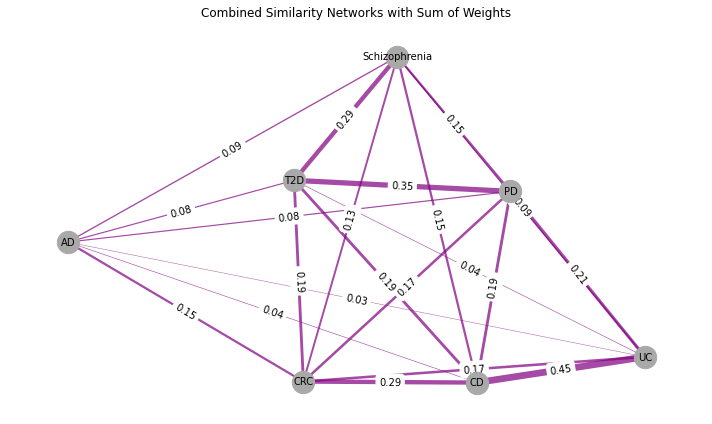

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample data representing similarities between objects
similarity_data_diseased = {
    ("CD", "UC"): 0.27,("CD", "PD"): 0.12,("CD", "T2D"): 0.15,("CD", "CRC"): 0.17,("CD", "Schizophrenia"): 0.09,("CD", "AD"): 0.01,
    ("UC", "PD"): 0.11,("UC", "T2D"): 0.03,("UC", "CRC"): 0.1,("UC", "Schizophrenia"): 0.01,("UC", "AD"): 0.01,
    ("PD", "T2D"): 0.23,("PD", "CRC"): 0.1,("PD", "Schizophrenia"): 0.09,("PD", "AD"): 0.04,
    ("T2D", "CRC"): 0.06,("T2D", "Schizophrenia"): 0.09,("T2D", "AD"): 0.05,
    ("CRC", "Schizophrenia"): 0.11,("CRC", "AD"): 0.06,
    ("Schizophrenia", "AD"): 0.08
}

similarity_data_healthy = {
    ("CD", "UC"): 0.18,("CD", "PD"):0.07,("CD", "T2D"):0.04,("CD", "CRC"): 0.12,("CD", "Schizophrenia"):0.06,("CD", "AD"):0.03,
    ("UC", "PD"): 0.1,("UC", "T2D"): 0.01,("UC", "CRC"): 0.07,("UC", "Schizophrenia"): 0.08,("UC", "AD"): 0.02,
    ("PD", "T2D"): 0.12,("PD", "CRC"): 0.07,("PD", "Schizophrenia"): 0.06,("PD", "AD"): 0.04,
    ("T2D", "CRC"): 0.13,("T2D", "Schizophrenia"): 0.2,("T2D", "AD"): 0.03,
    ("CRC", "Schizophrenia"): 0.02,("CRC", "AD"): 0.09,
    ("Schizophrenia", "AD"): 0.01
}

# Create graphs
G_diseased = nx.Graph()
G_healthy = nx.Graph()

# Add nodes and edges with similarity scores as weights
for G, similarity_data, edge_color in zip([G_diseased, G_healthy], [similarity_data_diseased, similarity_data_healthy], ['salmon', 'skyblue']):
    nodes = set(node for edge in similarity_data.keys() for node in edge)
    G.add_nodes_from(nodes)
    for edge, similarity in similarity_data.items():
        G.add_edge(edge[0], edge[1], weight=similarity, color=edge_color)

# Combine edges from both graphs
combined_edges = set(G_diseased.edges()) | set(G_healthy.edges())

# Create a new graph for the combined network
G_combined = nx.Graph()

# Add nodes
G_combined.add_nodes_from(G_diseased.nodes)

# Add edges with weights as the sum of weights from G_diseased and G_healthy
for u, v in combined_edges:
    weight_diseased = G_diseased[u][v]['weight'] if G_diseased.has_edge(u, v) else 0
    weight_healthy = G_healthy[u][v]['weight'] if G_healthy.has_edge(u, v) else 0
    G_combined.add_edge(u, v, weight=weight_diseased + weight_healthy)

# Define edge widths based on the sum of similarity scores
edge_weights_combined = [data['weight'] for _, _, data in G_combined.edges(data=True)]
edge_widths_combined = [w * 15 for w in edge_weights_combined]  # Adjust the scaling factor as needed

# Create subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Define positions of the nodes using Fruchterman-Reingold force-directed algorithm
pos = nx.spring_layout(G_combined)

# Draw nodes
nx.draw_networkx_nodes(G_combined, pos, node_size=500, node_color='darkgray', ax=ax)
nx.draw_networkx_labels(G_combined, pos, font_size=10, ax=ax)

# Draw edges with widths based on the sum of similarity scores
nx.draw_networkx_edges(
    G_combined,
    pos,
    edgelist=G_combined.edges(),
    width=edge_widths_combined,
    edge_color='purple',
    alpha=0.7,
    ax=ax
)

# Draw edge labels with custom font color
edge_labels_combined = nx.get_edge_attributes(G_combined, 'weight')
edge_labels_combined = {(u, v): f"{weight:.2f}" for (u, v), weight in edge_labels_combined.items()}
nx.draw_networkx_edge_labels(G_combined, pos, edge_labels=edge_labels_combined, font_size=10, font_color='black', ax=ax)

ax.set_title('Combined Similarity Networks with Sum of Weights')
ax.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.savefig("combined_similarity_networks_sum_weights.pdf", format="pdf", bbox_inches="tight")
plt.show()

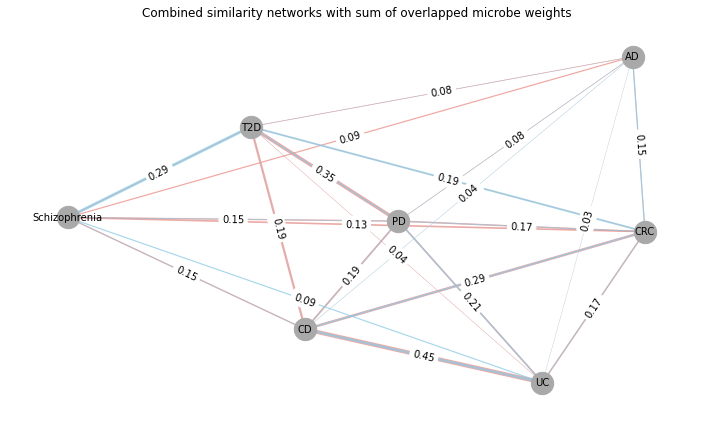

In [23]:
# Create subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Draw nodes
nx.draw_networkx_nodes(G_combined, pos, node_size=500, node_color='darkgray', ax=ax)
nx.draw_networkx_labels(G_combined, pos, font_size=10, ax=ax)

# Draw edges for G_diseased
nx.draw_networkx_edges(
    G_diseased,
    pos,
    edgelist=G_diseased.edges(),
    width=[w * 15 for w in nx.get_edge_attributes(G_diseased, 'weight').values()],  # Adjust the scaling factor as needed
    edge_color='salmon',
    alpha=0.7,
    ax=ax
)

# Draw edges for G_healthy
nx.draw_networkx_edges(
    G_healthy,
    pos,
    edgelist=G_healthy.edges(),
    width=[w * 15 for w in nx.get_edge_attributes(G_healthy, 'weight').values()],  # Adjust the scaling factor as needed
    edge_color='skyblue',
    alpha=0.7,
    ax=ax
)

# Draw edge labels with custom font color
edge_labels_combined = nx.get_edge_attributes(G_combined, 'weight')
edge_labels_combined = {(u, v): f"{weight:.2f}" for (u, v), weight in edge_labels_combined.items()}
nx.draw_networkx_edge_labels(G_combined, pos, edge_labels=edge_labels_combined, font_size=10, font_color='black', ax=ax)

ax.set_title('Combined similarity networks with sum of overlapped microbe weights')
ax.axis('off')  # Turn off axis labels


plt.tight_layout()
plt.savefig("combined_similarity_networks_sum_weights_colored.pdf", format="pdf", bbox_inches="tight")
plt.show()


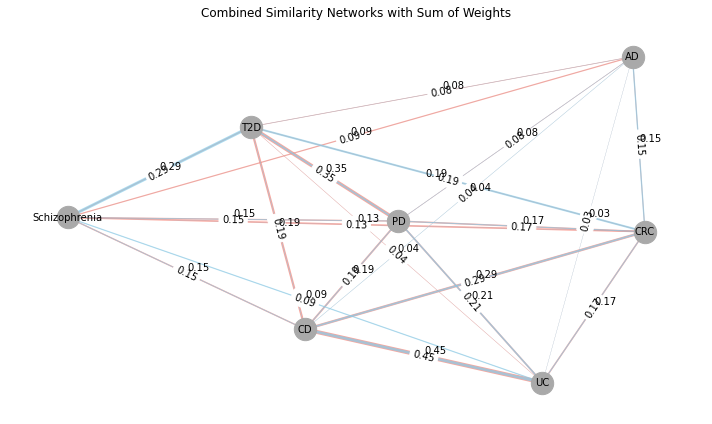

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Sample data representing similarities between objects
similarity_data_diseased = {
    ("CD", "UC"): 0.27,("CD", "PD"): 0.12,("CD", "T2D"): 0.15,("CD", "CRC"): 0.17,("CD", "Schizophrenia"): 0.09,("CD", "AD"): 0.01,
    ("UC", "PD"): 0.11,("UC", "T2D"): 0.03,("UC", "CRC"): 0.1,("UC", "Schizophrenia"): 0.01,("UC", "AD"): 0.01,
    ("PD", "T2D"): 0.23,("PD", "CRC"): 0.1,("PD", "Schizophrenia"): 0.09,("PD", "AD"): 0.04,
    ("T2D", "CRC"): 0.06,("T2D", "Schizophrenia"): 0.09,("T2D", "AD"): 0.05,
    ("CRC", "Schizophrenia"): 0.11,("CRC", "AD"): 0.06,
    ("Schizophrenia", "AD"): 0.08
}

similarity_data_healthy = {
    ("CD", "UC"): 0.18,("CD", "PD"):0.07,("CD", "T2D"):0.04,("CD", "CRC"): 0.12,("CD", "Schizophrenia"):0.06,("CD", "AD"):0.03,
    ("UC", "PD"): 0.1,("UC", "T2D"): 0.01,("UC", "CRC"): 0.07,("UC", "Schizophrenia"): 0.08,("UC", "AD"): 0.02,
    ("PD", "T2D"): 0.12,("PD", "CRC"): 0.07,("PD", "Schizophrenia"): 0.06,("PD", "AD"): 0.04,
    ("T2D", "CRC"): 0.13,("T2D", "Schizophrenia"): 0.2,("T2D", "AD"): 0.03,
    ("CRC", "Schizophrenia"): 0.02,("CRC", "AD"): 0.09,
    ("Schizophrenia", "AD"): 0.01
}

# Create graphs
G_diseased = nx.Graph()
G_healthy = nx.Graph()

# Add nodes and edges with similarity scores as weights
for G, similarity_data, edge_color in zip([G_diseased, G_healthy], [similarity_data_diseased, similarity_data_healthy], ['salmon', 'skyblue']):
    nodes = set(node for edge in similarity_data.keys() for node in edge)
    G.add_nodes_from(nodes)
    for edge, similarity in similarity_data.items():
        G.add_edge(edge[0], edge[1], weight=similarity, color=edge_color)

# Combine edges from both graphs
combined_edges = set(G_diseased.edges()) | set(G_healthy.edges())

# Create a new graph for the combined network
G_combined = nx.Graph()

# Add nodes
G_combined.add_nodes_from(G_diseased.nodes)

# Add edges with weights as the sum of weights from G_diseased and G_healthy
for u, v in combined_edges:
    weight_diseased = G_diseased[u][v]['weight'] if G_diseased.has_edge(u, v) else 0
    weight_healthy = G_healthy[u][v]['weight'] if G_healthy.has_edge(u, v) else 0
    G_combined.add_edge(u, v, weight=weight_diseased + weight_healthy)

# Define edge widths based on the sum of similarity scores
edge_weights_combined = [data['weight'] for _, _, data in G_combined.edges(data=True)]
edge_widths_combined = [w * 15 for w in edge_weights_combined]  # Adjust the scaling factor as needed

# Create subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Define positions of the nodes using Fruchterman-Reingold force-directed algorithm
pos = nx.spring_layout(G_combined)

# Draw nodes
nx.draw_networkx_nodes(G_combined, pos, node_size=500, node_color='darkgray', ax=ax)
nx.draw_networkx_labels(G_combined, pos, font_size=10, ax=ax)

# Draw edges for G_diseased
nx.draw_networkx_edges(
    G_diseased,
    pos,
    edgelist=G_diseased.edges(),
    width=[w * 15 for w in nx.get_edge_attributes(G_diseased, 'weight').values()],  # Adjust the scaling factor as needed
    edge_color='salmon',
    alpha=0.7,
    ax=ax
)

# Draw edges for G_healthy
nx.draw_networkx_edges(
    G_healthy,
    pos,
    edgelist=G_healthy.edges(),
    width=[w * 15 for w in nx.get_edge_attributes(G_healthy, 'weight').values()],  # Adjust the scaling factor as needed
    edge_color='skyblue',
    alpha=0.7,
    ax=ax
)
# Draw edge labels with custom font color
edge_labels_combined = nx.get_edge_attributes(G_combined, 'weight')
edge_labels_combined = {(u, v): f"{weight:.2f}" for (u, v), weight in edge_labels_combined.items()}
nx.draw_networkx_edge_labels(G_combined, pos, edge_labels=edge_labels_combined, font_size=10, font_color='black', ax=ax)

texts = []
for (u, v), label in edge_labels_combined.items():
    # Get the position of the edge label
    x = (pos[u][0] + pos[v][0]) / 2
    y = (pos[u][1] + pos[v][1]) / 2

    # Add the text to the list of texts to adjust
    texts.append(plt.text(x, y, label, fontsize=10, color='black'))

# Adjust the positions of the edge labels
adjust_text(texts)

ax.set_title('Combined Similarity Networks with Sum of Weights')
ax.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.savefig("combined_similarity_networks_sum_weights.pdf", format="pdf", bbox_inches="tight")
plt.show()

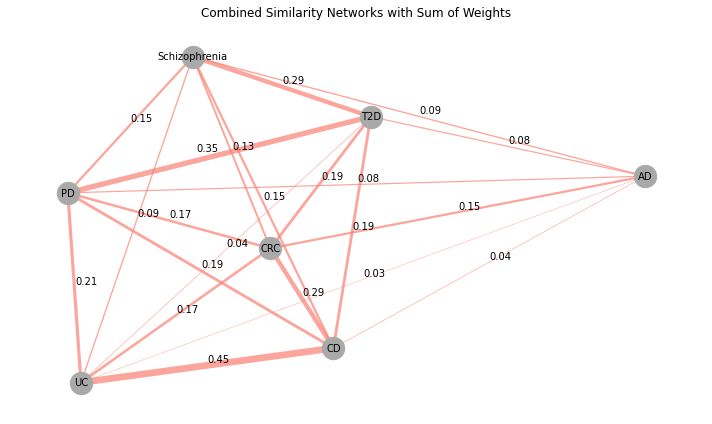

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Sample data representing similarities between objects
similarity_data_diseased = {
    ("CD", "UC"): 0.27,("CD", "PD"): 0.12,("CD", "T2D"): 0.15,("CD", "CRC"): 0.17,("CD", "Schizophrenia"): 0.09,("CD", "AD"): 0.01,
    ("UC", "PD"): 0.11,("UC", "T2D"): 0.03,("UC", "CRC"): 0.1,("UC", "Schizophrenia"): 0.01,("UC", "AD"): 0.01,
    ("PD", "T2D"): 0.23,("PD", "CRC"): 0.1,("PD", "Schizophrenia"): 0.09,("PD", "AD"): 0.04,
    ("T2D", "CRC"): 0.06,("T2D", "Schizophrenia"): 0.09,("T2D", "AD"): 0.05,
    ("CRC", "Schizophrenia"): 0.11,("CRC", "AD"): 0.06,
    ("Schizophrenia", "AD"): 0.08
}

similarity_data_healthy = {
    ("CD", "UC"): 0.18,("CD", "PD"):0.07,("CD", "T2D"):0.04,("CD", "CRC"): 0.12,("CD", "Schizophrenia"):0.06,("CD", "AD"):0.03,
    ("UC", "PD"): 0.1,("UC", "T2D"): 0.01,("UC", "CRC"): 0.07,("UC", "Schizophrenia"): 0.08,("UC", "AD"): 0.02,
    ("PD", "T2D"): 0.12,("PD", "CRC"): 0.07,("PD", "Schizophrenia"): 0.06,("PD", "AD"): 0.04,
    ("T2D", "CRC"): 0.13,("T2D", "Schizophrenia"): 0.2,("T2D", "AD"): 0.03,
    ("CRC", "Schizophrenia"): 0.02,("CRC", "AD"): 0.09,
    ("Schizophrenia", "AD"): 0.01
}

# Create graphs
G_diseased = nx.Graph()
G_healthy = nx.Graph()

# Add nodes and edges with similarity scores as weights
for G, similarity_data, edge_color in zip([G_diseased, G_healthy], [similarity_data_diseased, similarity_data_healthy], ['salmon', 'skyblue']):
    nodes = set(node for edge in similarity_data.keys() for node in edge)
    G.add_nodes_from(nodes)
    for edge, similarity in similarity_data.items():
        G.add_edge(edge[0], edge[1], weight=similarity, color=edge_color)

# Combine edges from both graphs
combined_edges = set(G_diseased.edges()) | set(G_healthy.edges())

# Create a new graph for the combined network
G_combined = nx.Graph()

# Add nodes
G_combined.add_nodes_from(G_diseased.nodes)

# Add edges with weights as the sum of weights from G_diseased and G_healthy
for u, v in combined_edges:
    weight_diseased = G_diseased[u][v]['weight'] if G_diseased.has_edge(u, v) else 0
    weight_healthy = G_healthy[u][v]['weight'] if G_healthy.has_edge(u, v) else 0
    edge_color = G_diseased[u][v]['color'] if G_diseased.has_edge(u, v) else G_healthy[u][v]['color']
    G_combined.add_edge(u, v, weight=weight_diseased + weight_healthy, color=edge_color)

# Define edge widths based on the sum of similarity scores
edge_weights_combined = [data['weight'] for _, _, data in G_combined.edges(data=True)]
edge_widths_combined = [w * 15 for w in edge_weights_combined]  # Adjust the scaling factor as needed

# Create subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Define positions of the nodes using Fruchterman-Reingold force-directed algorithm
pos = nx.spring_layout(G_combined)

# Draw nodes
nx.draw_networkx_nodes(G_combined, pos, node_size=500, node_color='darkgray', ax=ax)
nx.draw_networkx_labels(G_combined, pos, font_size=10, ax=ax)

# Draw edges with widths and colors based on the sum of similarity scores and the edge type
edge_colors_combined = [data['color'] for _, _, data in G_combined.edges(data=True)]
nx.draw_networkx_edges(
    G_combined,
    pos,
    edgelist=G_combined.edges(),
    width=edge_widths_combined,
    edge_color=edge_colors_combined,
    alpha=0.7,
    ax=ax
)

# Draw edge labels with custom font color
edge_labels_combined = nx.get_edge_attributes(G_combined, 'weight')
edge_labels_combined = {(u, v): f"{weight:.2f}" for (u, v), weight in edge_labels_combined.items()}

texts = []
for (u, v), label in edge_labels_combined.items():
    # Get the position of the edge label
    x = (pos[u][0] + pos[v][0]) / 2
    y = (pos[u][1] + pos[v][1]) / 2

    # Add the text to the list of texts to adjust
    texts.append(plt.text(x, y, label, fontsize=10, color='black'))

# Adjust the positions of the edge labels
adjust_text(texts)

ax.set_title('Combined Similarity Networks with Sum of Weights')
ax.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.savefig("combined_similarity_networks_sum_weights.pdf", format="pdf", bbox_inches="tight")
plt.show()

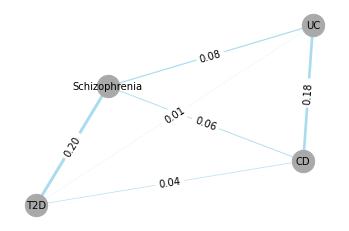

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample data representing similarities between objects
similarity_data = {
    ("CD", "UC"): 0.18,
    ("CD", "T2D"): 0.04,
    ("CD", "Schizophrenia"): 0.06,
    ("UC", "T2D"): 0.01,
    ("UC", "Schizophrenia"): 0.08,
    ("Schizophrenia", "T2D"): 0.2
}

# Create a graph
G = nx.Graph()

# Add nodes
nodes = set(node for edge in similarity_data.keys() for node in edge)
G.add_nodes_from(nodes)

# Add edges with similarity scores as weights
for edge, similarity in similarity_data.items():
    G.add_edge(edge[0], edge[1], weight=similarity)

# Customize the plot
pos = nx.spring_layout(G, seed=42)  # Layout algorithm with a fixed seed for reproducibility

# Define edge widths based on similarity scores
edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]
edge_widths = [w * 15 for w in edge_weights]  # Adjust the scaling factor as needed

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='darkgray')
nx.draw_networkx_labels(G, pos, font_size=10)

# Draw edges with widths based on similarity scores
nx.draw_networkx_edges(
    G,
    pos,
    width=edge_widths,
    edge_color='skyblue',
    alpha=0.7,
)

# Draw edge labels with custom font color
edge_labels = {(u, v): f"{weight:.2f}" for (u, v), weight in similarity_data.items()}
edge_label_colors = 'black'  # Change this to your desired font color
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color=edge_label_colors)

# Show the plot
plt.axis('off')  # Turn off axis labels
#plt.show()
plt.savefig("similarity_network_healthy_associated.pdf", format="pdf", bbox_inches="tight")

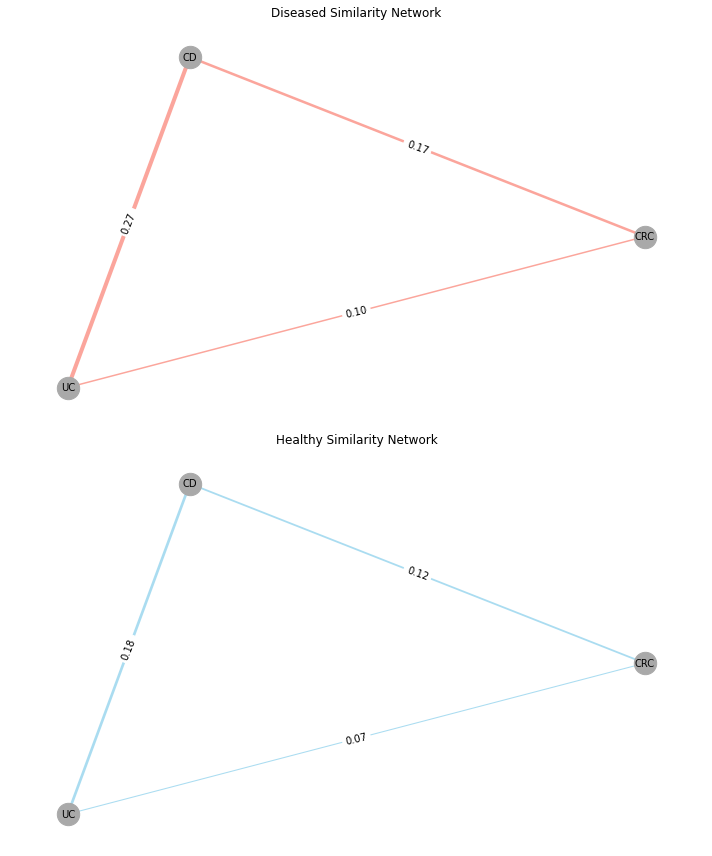

In [10]:
# Create subplot
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

for ax, G, edge_widths, title in zip(axs, [G_diseased, G_healthy], [edge_widths_diseased, edge_widths_healthy], ['Diseased Similarity Network', 'Healthy Similarity Network']):
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='darkgray', ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=10, ax=ax)

    # Draw edges with widths based on similarity scores
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=G.edges(),
        width=edge_widths,
        edge_color=[data['color'] for _, _, data in G.edges(data=True)],
        alpha=0.7,
        ax=ax
    )

    # Draw edge labels with custom font color
    edge_labels = nx.get_edge_attributes(G, 'weight')
    edge_labels = {(u, v): f"{weight:.2f}" for (u, v), weight in edge_labels.items()}
    edge_label_colors = 'black'  # Change this to your desired font color
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color=edge_label_colors, ax=ax)

    ax.set_title(title)
    ax.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.savefig("separate_similarity_networks.pdf", format="pdf", bbox_inches="tight")
plt.show()


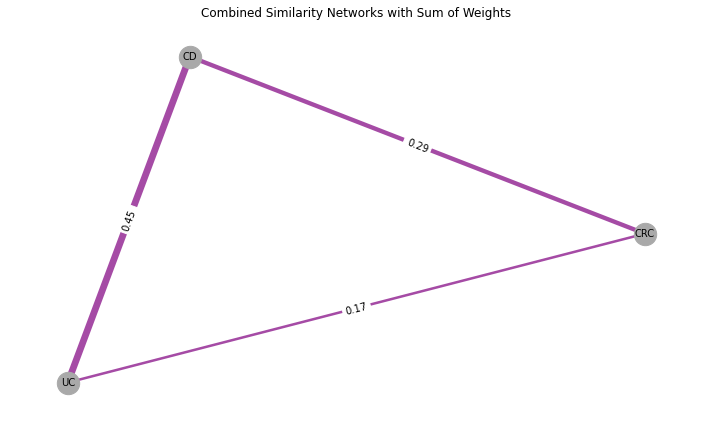

In [9]:
# Create a new graph for the combined network
G_combined = nx.Graph()

# Add nodes
G_combined.add_nodes_from(G_diseased.nodes)

# Add edges with weights as the sum of weights from G_diseased and G_healthy
for u, v in combined_edges:
    weight_diseased = G_diseased[u][v]['weight'] if G_diseased.has_edge(u, v) else 0
    weight_healthy = G_healthy[u][v]['weight'] if G_healthy.has_edge(u, v) else 0
    G_combined.add_edge(u, v, weight=weight_diseased + weight_healthy)

# Define edge widths based on the sum of similarity scores
edge_weights_combined = [data['weight'] for _, _, data in G_combined.edges(data=True)]
edge_widths_combined = [w * 15 for w in edge_weights_combined]  # Adjust the scaling factor as needed

# Create subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Draw nodes
nx.draw_networkx_nodes(G_combined, pos, node_size=500, node_color='darkgray', ax=ax)
nx.draw_networkx_labels(G_combined, pos, font_size=10, ax=ax)

# Draw edges with widths based on the sum of similarity scores
nx.draw_networkx_edges(
    G_combined,
    pos,
    edgelist=G_combined.edges(),
    width=edge_widths_combined,
    edge_color='purple',
    alpha=0.7,
    ax=ax
)

# Draw edge labels with custom font color
edge_labels_combined = nx.get_edge_attributes(G_combined, 'weight')
edge_labels_combined = {(u, v): f"{weight:.2f}" for (u, v), weight in edge_labels_combined.items()}
nx.draw_networkx_edge_labels(G_combined, pos, edge_labels=edge_labels_combined, font_size=10, font_color='black', ax=ax)

ax.set_title('Combined Similarity Networks with Sum of Weights')
ax.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.savefig("combined_similarity_networks_sum_weights.pdf", format="pdf", bbox_inches="tight")
plt.show()


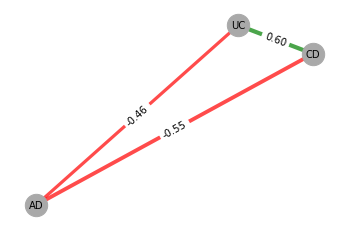

In [87]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample data representing similarities between objects
similarity_data = {
    ("CD", "UC"): 0.6,
    ("CD", "AD"): -0.55, # Negative correlation
    #("CD", "PD"): 0.25,  
    #("CD", "T2D"): 0.22,
    ("UC", "AD"): -0.46  # Negative correlation
    #("UC", "PD"): 0.43,
    #("UC", "T2D"): -0.11,  # Negative correlation
    #("AD", "PD"): -0.28,
    #("AD", "T2D"): -0.11,
    #("PD", "T2D"): 0.43
}

# Create a graph
G = nx.Graph()

# Add nodes
nodes = set(node for edge in similarity_data.keys() for node in edge)
G.add_nodes_from(nodes)

# Add edges with similarity scores as weights
for edge, similarity in similarity_data.items():
    G.add_edge(edge[0], edge[1], weight=similarity)

# Customize the plot
pos = nx.spring_layout(G, seed=42)  # Layout algorithm with a fixed seed for reproducibility

# Define edge widths based on similarity scores
edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]
edge_widths = [w * 7 for w in edge_weights]  # Adjust the scaling factor as needed

# Define edge colors based on positive (blue) and negative (red) correlations
edge_colors = ['green' if similarity >= 0 else 'red' for similarity in edge_weights]

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='darkgray')
nx.draw_networkx_labels(G, pos, font_size=10)

# Draw edges with widths and different colors
nx.draw_networkx_edges(
    G,
    pos,
    width=edge_widths,
    edge_color=edge_colors,  # Use the colors based on correlations
    alpha=0.7,
)

# Draw edge labels with custom font color
edge_labels = {(u, v): f"{weight:.2f}" for (u, v), weight in similarity_data.items()}
edge_label_colors = 'black'  # Change this to your desired font color
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color=edge_label_colors)

# Show the plot
plt.axis('off')  # Turn off axis labels
#plt.show()
plt.savefig("similarity_network_genes.pdf", format="pdf", bbox_inches="tight")

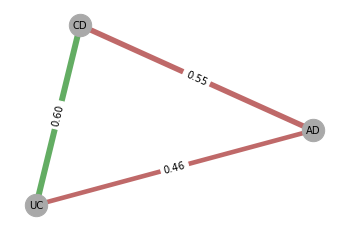

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample data representing similarities between objects
similarity_data = {
    ("CD", "UC"): 0.6,
    ("CD", "AD"): 0.55,  # Negative correlation
    ("UC", "AD"): 0.46,  # Negative correlation
}

# Create a graph
G = nx.Graph()

# Add nodes
nodes = set(node for edge in similarity_data.keys() for node in edge)
G.add_nodes_from(nodes)

# Add edges with similarity scores as weights
for edge, similarity in similarity_data.items():
    G.add_edge(edge[0], edge[1], weight=similarity)

# Customize the plot
pos = nx.spring_layout(G, seed=42)  # Layout algorithm with a fixed seed for reproducibility

# Define edge widths based on similarity scores
edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]
edge_widths = [w * 10 for w in edge_weights]  # Adjust the scaling factor as needed

# Define edge colors based on positive (blue) and negative (red) correlations
edge_colors = ['forestgreen' if similarity >= 0.56 else 'brown' for similarity in edge_weights]

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='darkgray')
nx.draw_networkx_labels(G, pos, font_size=10)

# Draw edges with widths and explicit edge colors
nx.draw_networkx_edges(
    G,
    pos,
    width=edge_widths,
    edge_color=edge_colors,  # Use the explicit colors based on correlations
    alpha=0.7,
)

# Draw edge labels with custom font color
edge_labels = {(u, v): f"{weight:.2f}" for (u, v), weight in similarity_data.items()}
edge_label_colors = 'black'  # Change this to your desired font color
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color=edge_label_colors)

# Show the plot
plt.axis('off')  # Turn off axis labels
# plt.show()

# Save the plot as a PDF file
plt.savefig("similarity_network_genes.pdf", format="pdf", bbox_inches="tight")


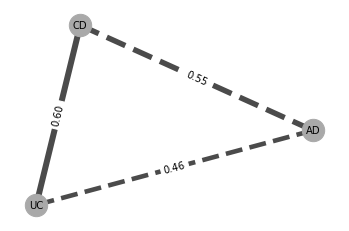

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample data representing similarities between objects
similarity_data = {
    ("CD", "UC"): 0.6,
    ("CD", "AD"): 0.55,  # Negative correlation
    ("UC", "AD"): 0.46,  # Negative correlation
}

# Create a graph
G = nx.Graph()

# Add nodes
nodes = set(node for edge in similarity_data.keys() for node in edge)
G.add_nodes_from(nodes)

# Add edges with similarity scores as weights
for edge, similarity in similarity_data.items():
    G.add_edge(edge[0], edge[1], weight=similarity)

# Customize the plot
pos = nx.spring_layout(G, seed=42)  # Layout algorithm with a fixed seed for reproducibility

# Define edge widths based on similarity scores
edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]
edge_widths = [w * 10 for w in edge_weights]  # Adjust the scaling factor as needed

# Define edge colors based on positive (blue) and negative (red) correlations
edge_colors = ['forestgreen' if similarity >= 0.56 else 'brown' for similarity in edge_weights]

# Define edge styles based on color
edge_styles = ['dashed' if color == 'brown' else 'solid' for color in edge_colors]

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='darkgray')
nx.draw_networkx_labels(G, pos, font_size=10)

# Draw edges with widths, styles, and explicit edge colors
nx.draw_networkx_edges(
    G,
    pos,
    width=edge_widths,
    edge_color='black',  # Use black color for all edges
    style=edge_styles,  # Use the defined edge styles
    alpha=0.7,
)

# Draw edge labels with custom font color
edge_labels = {(u, v): f"{weight:.2f}" for (u, v), weight in similarity_data.items()}
edge_label_colors = 'black'  # Change this to your desired font color
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color=edge_label_colors)

# Show the plot
plt.axis('off')  # Turn off axis labels
#plt.show()

# Save the plot as a PDF file
plt.savefig("similarity_network_genes_new.pdf", format="pdf", bbox_inches="tight")
